# polynomial Regression

Configure the project. Indeed you create a dataset in csv format.

In [102]:
! rm -rf *.csv
! unzip ./dataset/archive.zip
! mv dataset.csv data.csv


Archive:  ./dataset/archive.zip
  inflating: dataset.csv             


Import needed libraries

In [103]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

%matplotlib inline

Read data from data.csv using pandas and store in data frame structure. Also shuffle data to have uniform distribution. 

In [104]:
df = pd.read_csv("data.csv")
df.head()
df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,F,KW,KuwaIT,MiddleSchool,G-07,A,English,F,Father,19,30,26,19,Yes,Bad,Above-7,M
1,F,Lybia,Lybia,MiddleSchool,G-07,B,Biology,F,Mum,10,9,2,1,No,Good,Above-7,L
2,M,Jordan,Palestine,MiddleSchool,G-07,A,Biology,F,Mum,78,91,50,40,Yes,Good,Under-7,H
3,M,Palestine,Jordan,MiddleSchool,G-06,A,English,S,Mum,92,31,42,27,Yes,Good,Under-7,H
4,M,Palestine,Palestine,MiddleSchool,G-07,A,Biology,S,Father,89,92,89,83,Yes,Good,Under-7,H


In [105]:
categorical_attr = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

le = LabelEncoder()
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0,4,4,1,4,0,3,0,0,19,30,26,19,1,0,0,2
1,0,5,5,1,4,1,1,0,1,10,9,2,1,0,1,0,1
2,1,3,7,1,4,0,1,0,1,78,91,50,40,1,1,1,0
3,1,7,3,1,3,0,3,1,1,92,31,42,27,1,1,1,0
4,1,7,7,1,4,0,1,1,0,89,92,89,83,1,1,1,0


In [106]:
# summarize data
df.describe() 

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.635417,4.345833,4.397917,1.345833,2.906250,0.472917,5.256250,0.489583,0.410417,46.775000,54.797917,37.918750,43.283333,0.562500,0.608333,0.602083,1.143750
std,0.481815,2.469265,2.628334,0.603732,2.464267,0.612411,3.388388,0.500413,0.492423,30.779223,33.080007,26.611244,27.637735,0.496596,0.488632,0.489979,0.846312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,3.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,15.750000,20.000000,14.000000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,4.000000,4.000000,1.000000,4.000000,0.000000,5.000000,0.000000,0.000000,50.000000,65.000000,33.000000,39.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,4.000000,2.000000,5.000000,1.000000,7.000000,1.000000,1.000000,75.000000,84.000000,58.000000,70.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,13.000000,13.000000,2.000000,9.000000,2.000000,11.000000,1.000000,1.000000,100.000000,99.000000,98.000000,99.000000,1.000000,1.000000,1.000000,2.000000


Print the histogram chart of data

In [107]:
print(df.columns)

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')


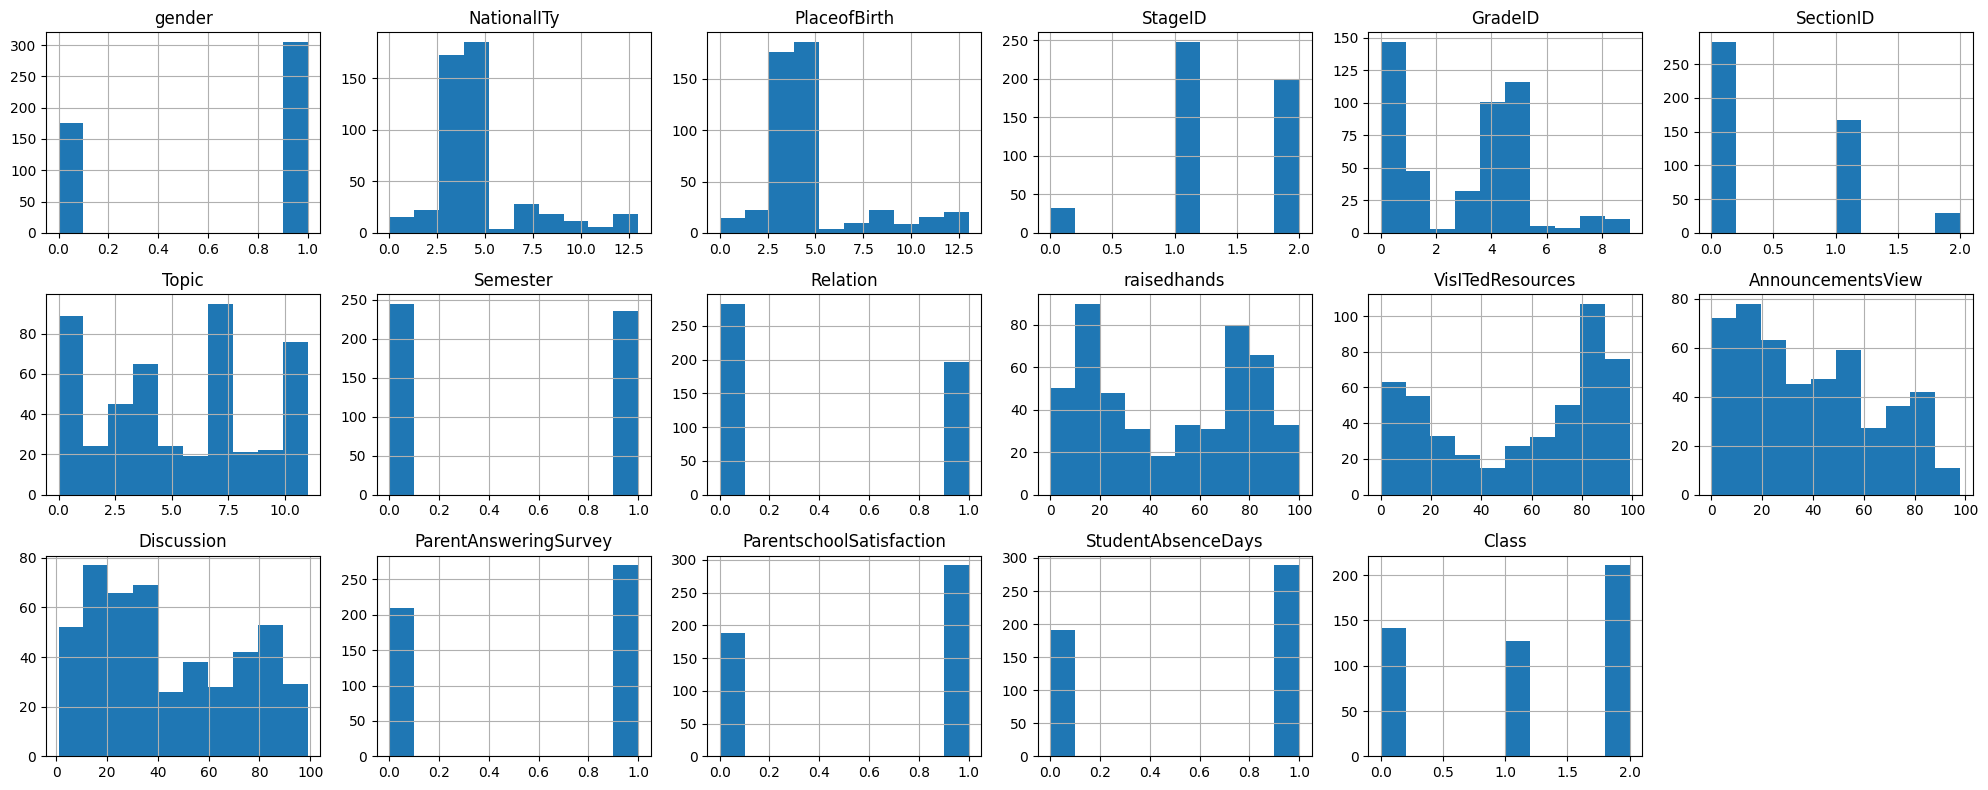

In [108]:
viz = df[['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']]
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 8))

axes = axes.flatten()

for i, column in enumerate(viz.columns):
    viz[column].hist(ax=axes[i])
    axes[i].set_title(column)

fig.delaxes(axes[17])
plt.tight_layout()
plt.show()

Print scatter chart of data to recognize the patterns of data. I draw them based on VisITedResources parameter.

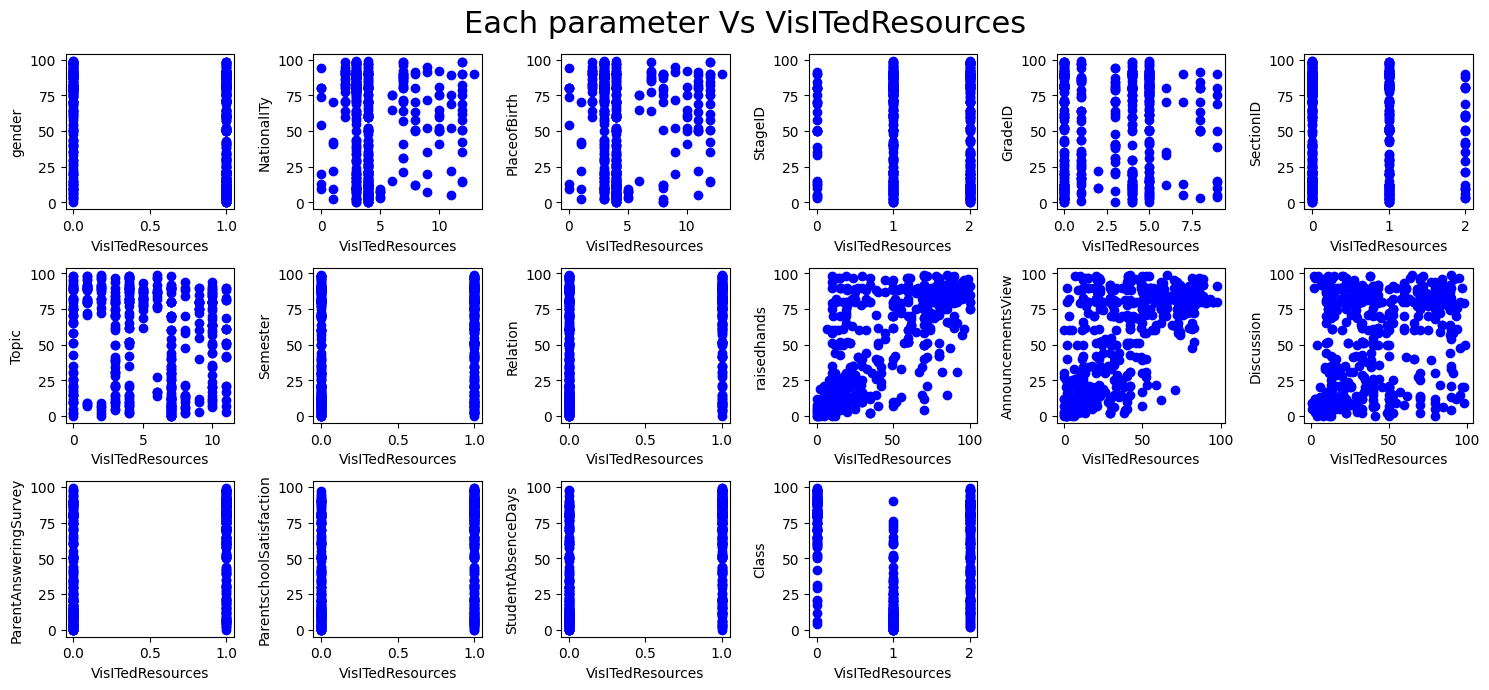

In [110]:
fig, axs = plt.subplots(3, 6, figsize=(15, 7))
fig.delaxes(axs[2, 4])
fig.delaxes(axs[2, 5])  # To remove extra empty plots since 3x6 = 18 but we only need 16 plots

columns = df.columns.drop('VisITedResources')
row, col = 0, 0

for column in columns:
    if col == 6:
        col = 0
        row += 1
    axs[row, col].scatter(df[column], df['VisITedResources'], color="blue")
    axs[row, col].set_ylabel(column)
    axs[row, col].set_xlabel('VisITedResources')
    col += 1

fig.suptitle("Each parameter Vs VisITedResources", fontsize=22)

plt.tight_layout()
plt.show()

Make the dataset minimal to work with it more easily

In [112]:
df = df[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']]

In [113]:
# print(df)
train, test = train_test_split(df, test_size=0.20, random_state=42)
# test, evaluate = train_test_split(test, test_size=0.5, random_state=42)

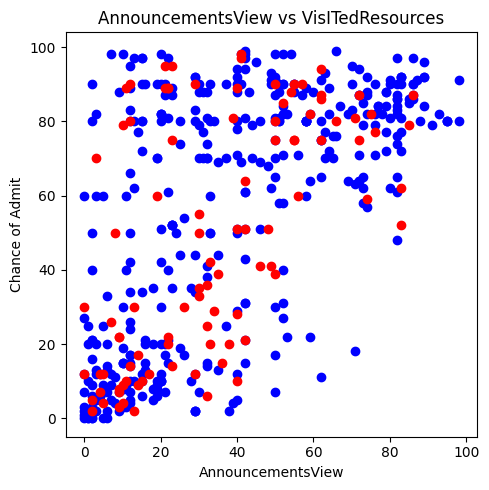

In [114]:

fig, ax1 = plt.subplots(1, figsize=(5, 5))

# Plot the original data
ax1.scatter(train["AnnouncementsView"], train["VisITedResources"], color="blue", label="Train")
ax1.scatter(test["AnnouncementsView"], test["VisITedResources"], color="red", label="Test")


# Set labels and title
ax1.set_ylabel("Chance of Admit")
ax1.set_xlabel("AnnouncementsView")
ax1.set_title("AnnouncementsView vs VisITedResources")
plt.tight_layout()
plt.show()

Find the best fitted line based on distribution of data. 

For better clarity and to make more sense, I will choose just one of the parameters based on VisITedResources for training. This is a mistake because the rest of the data also contains information and helps the learning process. However, for practice, instead of a multiple model, I want to use a single model which is clearer.

In [115]:
train_x = np.asanyarray(train[['AnnouncementsView']])
train_y = np.asanyarray(train[['VisITedResources']])
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[1.000e+00, 1.300e+01, 1.690e+02],
       [1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 7.200e+01, 5.184e+03],
       ...,
       [1.000e+00, 8.200e+01, 6.724e+03],
       [1.000e+00, 5.100e+01, 2.601e+03],
       [1.000e+00, 5.000e+00, 2.500e+01]])

In [116]:
reg = linear_model.LinearRegression()
train_y_ = reg.fit(train_x_poly, train_y)


print("Coefficients:\t", reg.coef_)
print("Intercept:\t", reg.intercept_)

Coefficients:	 [[ 0.          1.45712653 -0.00834579]]
Intercept:	 [18.3228313]


Draw the data scatters plot and fitted polynomial line.

Text(0, 0.5, 'VisITedResources')

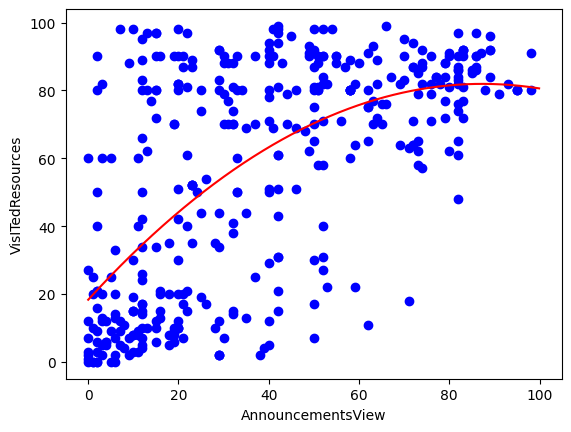

In [118]:
plt.scatter(train[['AnnouncementsView']], train["VisITedResources"],  color='blue')
XX = np.arange(0.0, 100.0, 0.1)
yy = reg.intercept_[0]+ reg.coef_[0][1]*XX+ reg.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("AnnouncementsView")
plt.ylabel("VisITedResources")

Testing model based on Test data. Measure the R2 and MSE.

In [121]:
test_x = np.asanyarray(test[['AnnouncementsView']])
test_y = np.asanyarray(test[['VisITedResources']])

test_x_poly = poly.fit_transform(test_x)
test_y_ = reg.predict(test_x_poly)

print("Mean absolute error: %.2f" % mean_absolute_error(test_y_, test_y))
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(test_y_, test_y))
print("R2-score: %.2f" % r2_score(test_y_, test_y))

Mean absolute error: 22.35
Residual sum of squares (MSE): 712.86
R2-score: -0.98


R2-score is -0.98. So it means our model is so poor. Lets do it with simple regression also.

In [122]:
train_y_ = reg.fit(train_x, train_y)

print("Coefficients:\t", reg.coef_)
print("Intercept:\t", reg.intercept_)

Coefficients:	 [[0.72608861]]
Intercept:	 [27.90304923]


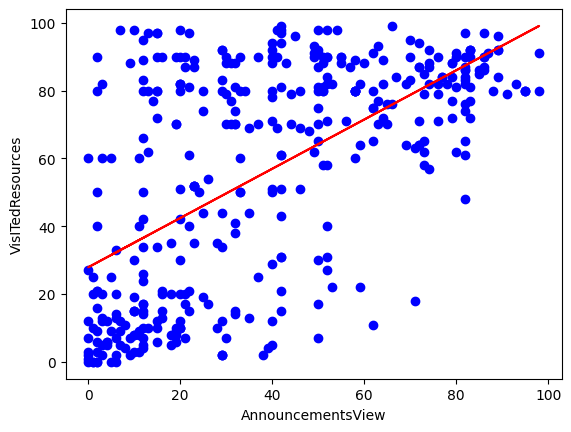

In [123]:
plt.scatter(train[['AnnouncementsView']], train["VisITedResources"],  color='blue')
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], "-r")
#               y = theta1 x + theta0
plt.ylabel("VisITedResources")
plt.xlabel("AnnouncementsView")
plt.show()

In [127]:
test_x = np.asanyarray(test[['AnnouncementsView']])
test_y = np.asanyarray(test[['VisITedResources']])

test_y_ = reg.predict(test_x)

print("Mean absolute error: %.2f" % mean_absolute_error(test_y_, test_y))
print("Residual sum of squares (MSE): %.2f" % mean_squared_error(test_y_, test_y))
print("R2-score: %.2f" % r2_score(test_y_, test_y))

Mean absolute error: 23.02
Residual sum of squares (MSE): 715.26
R2-score: -1.56


## As you see the polynomial has a better R2-score compare with linear but this data's need another solution. Regression method is not good for this type of problem! 

<font size="6" color="green">
Better types of problems that we can solve with polynomial regression are: Predicting GDP, Salary Based on Business Levels, House Prices, etc.
</font>

## Lets test other degrees for prediction:

Degree: 3
Coefficients: [[ 0.00000000e+00  1.87446936e+00 -2.03663236e-02  8.94008242e-05]]
Intercept: [15.54568529]
Mean absolute error: 22.58
Residual sum of squares (MSE): 719.31
R2-score: 0.30

Degree: 4
Coefficients: [[ 0.00000000e+00  2.01321173e+00 -2.75060802e-02  2.12359728e-04
  -6.70353033e-07]]
Intercept: [14.98883662]
Mean absolute error: 22.59
Residual sum of squares (MSE): 718.26
R2-score: 0.30

Degree: 5
Coefficients: [[ 0.00000000e+00  2.02327255e+00 -2.83155035e-02  2.36027012e-04
  -9.55781095e-07  1.20933364e-09]]
Intercept: [14.96333848]
Mean absolute error: 22.58
Residual sum of squares (MSE): 718.13
R2-score: 0.30

Degree: 6
Coefficients: [[ 0.00000000e+00  2.40704382e+00 -7.21893955e-02  2.15842312e-03
  -3.96908061e-05  3.63313236e-07 -1.27207598e-09]]
Intercept: [14.29201797]
Mean absolute error: 22.64
Residual sum of squares (MSE): 720.17
R2-score: 0.30

Degree: 7
Coefficients: [[ 0.00000000e+00 -2.92346324e-01  3.41454024e-01 -2.29254721e-02
   6.99873143e-0

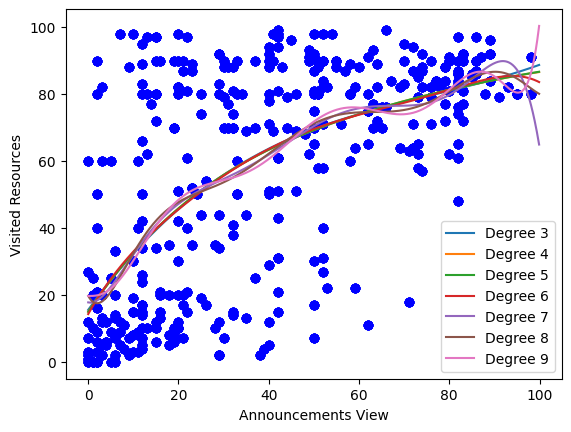


Summary of Performance Metrics:
Degree: 3 | MAE: 22.58 | MSE: 719.31 | R2: 0.30
Degree: 4 | MAE: 22.59 | MSE: 718.26 | R2: 0.30
Degree: 5 | MAE: 22.58 | MSE: 718.13 | R2: 0.30
Degree: 6 | MAE: 22.64 | MSE: 720.17 | R2: 0.30
Degree: 7 | MAE: 22.07 | MSE: 698.40 | R2: 0.32
Degree: 8 | MAE: 22.10 | MSE: 698.68 | R2: 0.32
Degree: 9 | MAE: 21.86 | MSE: 689.39 | R2: 0.33


In [101]:
degrees = range(3, 10)
results = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    train_x_poly = poly.fit_transform(train_x)
    reg = linear_model.LinearRegression()
    reg.fit(train_x_poly, train_y)
    
    # The coefficients
    print(f'Degree: {degree}')
    print('Coefficients:', reg.coef_)
    print('Intercept:', reg.intercept_)
    
    # Plotting
    plt.scatter(train[['AnnouncementsView']], train["VisITedResources"], color='blue')
    XX = np.arange(0.0, 100.0, 0.1)
    yy = reg.intercept_[0]
    for power in range(1, degree + 1):
        yy += reg.coef_[0][power] * np.power(XX, power)
    plt.plot(XX, yy, label=f'Degree {degree}')
    
    # Evaluation
    test_x_poly = poly.fit_transform(test_x)
    test_y_pred = reg.predict(test_x_poly)
    
    mae = mean_absolute_error(test_y, test_y_pred)
    mse = mean_squared_error(test_y, test_y_pred)
    r2 = r2_score(test_y, test_y_pred)
    
    results.append((degree, mae, mse, r2))
    
    print("Mean absolute error: %.2f" % mae)
    print("Residual sum of squares (MSE): %.2f" % mse)
    print("R2-score: %.2f\n" % r2)
    
plt.xlabel("Announcements View")
plt.ylabel("Visited Resources")
plt.legend()
plt.show()

# Display summary results
print("\nSummary of Performance Metrics:")
for degree, mae, mse, r2 in results:
    print(f'Degree: {degree} | MAE: {mae:.2f} | MSE: {mse:.2f} | R2: {r2:.2f}')

<font size="6" color="cyan">
Based on the obtained results, the situation slightly improved, but none of them are good enough. Hence, we can confidently say that it is better not to train this dataset with this method and instead use another method, especially neural networks, to achieve better accuracy. This learning model is suitable for the dataset mentioned in the previous section. This notebook is solely for learning and to ensure the resulting outcome :)
</font>